In [17]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal  import argrelextrema

In [18]:
df = pd.read_csv("Binance_BTCUSDT_d.csv")
df = df.drop(["unix", "Volume BTC", "Volume USDT", "tradecount"], axis = 1)
# convert to datetime
df['date'] = pd.to_datetime(df['date'])
# set the index
df.set_index('date', inplace=True)
df

,symbol,open,high,low,close
date,,,,,
2022-10-11,BTC/USDT,19131.87,19133.52,18950.01,19032.94
2022-10-10,BTC/USDT,19439.96,19525.00,19020.25,19131.87
2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02
2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96
2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09
...,...,...,...,...,...
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98


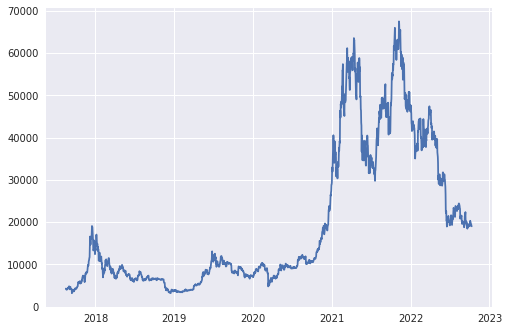

In [19]:
plt.style.use("seaborn")
plt.plot(df.index, df["close"])

In [20]:
df["min"] = df["close"][(df["close"] < df["close"].shift(1)) & (df["close"] < df["close"].shift(-1)) &
                        (df["close"] < df["close"].shift(2)) & (df["close"] < df["close"].shift(-2)) &
                        (df["close"] < df["close"].shift(3)) & (df["close"] < df["close"].shift(-3)) &
                        (df["close"] < df["close"].shift(4)) & (df["close"] < df["close"].shift(-4)) &
                        (df["close"] < df["close"].shift(5)) & (df["close"] < df["close"].shift(-5)) &
                        (df["close"] < df["close"].shift(6)) & (df["close"] < df["close"].shift(-6)) &
                        (df["close"] < df["close"].shift(7)) & (df["close"] < df["close"].shift(-7)) &
                        (df["close"] < df["close"].shift(8)) & (df["close"] < df["close"].shift(-8)) &
                        (df["close"] < df["close"].shift(9)) & (df["close"] < df["close"].shift(-9)) &
                        (df["close"] < df["close"].shift(10)) & (df["close"] < df["close"].shift(-10)) &
                        (df["close"] < df["close"].shift(11)) & (df["close"] < df["close"].shift(-11)) &
                        (df["close"] < df["close"].shift(12)) & (df["close"] < df["close"].shift(-12)) &
                        (df["close"] < df["close"].shift(13)) & (df["close"] < df["close"].shift(-13)) &
                        (df["close"] < df["close"].shift(14)) & (df["close"] < df["close"].shift(-14)) &
                        (df["close"] < df["close"].shift(15)) & (df["close"] < df["close"].shift(-15)) &
                        (df["close"] < df["close"].shift(16)) & (df["close"] < df["close"].shift(-16)) &
                        (df["close"] < df["close"].shift(17)) & (df["close"] < df["close"].shift(-17)) &
                        (df["close"] < df["close"].shift(18)) & (df["close"] < df["close"].shift(-18)) &
                        (df["close"] < df["close"].shift(19)) & (df["close"] < df["close"].shift(-19)) &
                        (df["close"] < df["close"].shift(20)) & (df["close"] < df["close"].shift(-20))]


df["max"] = df["close"][(df["close"] > df["close"].shift(1)) & (df["close"] > df["close"].shift(-1)) &
                        (df["close"] > df["close"].shift(2)) & (df["close"] > df["close"].shift(-2)) &
                        (df["close"] > df["close"].shift(3)) & (df["close"] > df["close"].shift(-3)) &
                        (df["close"] > df["close"].shift(4)) & (df["close"] > df["close"].shift(-4)) &
                        (df["close"] > df["close"].shift(5)) & (df["close"] > df["close"].shift(-5)) &
                        (df["close"] > df["close"].shift(6)) & (df["close"] > df["close"].shift(-6)) &
                        (df["close"] > df["close"].shift(7)) & (df["close"] > df["close"].shift(-7)) &
                        (df["close"] > df["close"].shift(8)) & (df["close"] > df["close"].shift(-8)) &
                        (df["close"] > df["close"].shift(9)) & (df["close"] > df["close"].shift(-9)) &
                        (df["close"] > df["close"].shift(10)) & (df["close"] > df["close"].shift(-10)) &
                        (df["close"] > df["close"].shift(11)) & (df["close"] > df["close"].shift(-11)) &
                        (df["close"] > df["close"].shift(12)) & (df["close"] > df["close"].shift(-12)) &
                        (df["close"] > df["close"].shift(13)) & (df["close"] > df["close"].shift(-13)) &
                        (df["close"] > df["close"].shift(14)) & (df["close"] > df["close"].shift(-14)) &
                        (df["close"] > df["close"].shift(15)) & (df["close"] > df["close"].shift(-15)) &
                        (df["close"] > df["close"].shift(16)) & (df["close"] > df["close"].shift(-16)) &
                        (df["close"] > df["close"].shift(17)) & (df["close"] > df["close"].shift(-17)) &
                        (df["close"] > df["close"].shift(18)) & (df["close"] > df["close"].shift(-18)) &
                        (df["close"] > df["close"].shift(19)) & (df["close"] > df["close"].shift(-19)) &
                        (df["close"] > df["close"].shift(20)) & (df["close"] > df["close"].shift(-20))]
df

,symbol,open,high,low,close,min,max
date,,,,,,,
2022-10-11,BTC/USDT,19131.87,19133.52,18950.01,19032.94,NaN,NaN
2022-10-10,BTC/USDT,19439.96,19525.00,19020.25,19131.87,NaN,NaN
2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02,NaN,NaN
2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96,NaN,NaN
2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09,NaN,NaN
...,...,...,...,...,...,...,...
2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,NaN,NaN
2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,NaN,NaN
2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,NaN,NaN


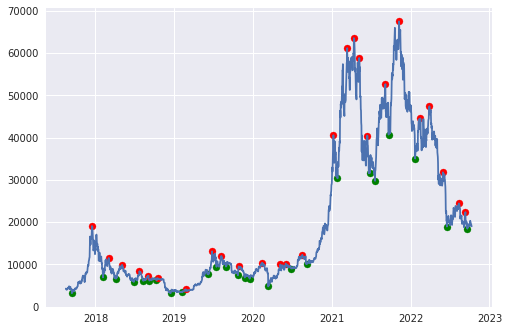

In [21]:
plt.style.use("seaborn")
plt.plot(df.index, df["close"])
plt.scatter(df.index, df["min"], c = "g")
plt.scatter(df.index, df["max"], c = "r")

In [22]:
min_values = df["min"].dropna()
max_values = df["max"].dropna()

date
2022-09-21    18461.36
2022-06-18    18970.79
2022-01-22    35071.42
2021-09-21    40734.38
2021-07-20    29790.35
2021-06-25    31584.45
2021-01-27    30366.15
2020-09-08    10126.65
2020-06-27     9012.00
2020-03-12     4800.00
2019-12-17     6623.82
2019-11-24     6903.28
2019-10-24     7412.41
2019-08-29     9498.44
2019-07-16     9439.59
2019-06-09     7628.13
2019-02-07     3398.40
2018-12-15     3211.72
2018-10-11     6252.68
2018-09-08     6185.05
2018-08-10     6144.01
2018-06-28     5853.98
2018-04-06     6601.39
2018-02-05     6939.99
2017-09-14     3189.02
Name: min, dtype: float64

In [ ]:
df.loc[
    
    
]